In [ ]:
!pip install sweetviz
!pip install h2o
import pandas as pd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.4/257.4 MB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.1-py2.py3-none-any.whl size=257484150 sha256=4eec32380a914462f9c4e29a7b499dd86c3112a4497d6bfda67644823646342a
  Stored in directory: /root/.cache/pip/wheels/d9/9b/ca/7345b72d17e1e17da37239d70631c3214ec9e541b0c9e700e2
Successfully built h2o


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
fashion_mnist_df = pd.read_csv('/content/gdrive/MyDrive/CMPE-255/Assignment 5/Data Set/Task-4/fashion-mnist_train.csv')


In [ ]:
# Check for missing values in the dataset
missing_values = fashion_mnist_df.isnull().sum().sum()

missing_values


0

In [ ]:
# Import Sweetviz
import sweetviz as sv

# Generate the report
report = sv.analyze(fashion_mnist_df, pairwise_analysis='off')
# Display the report
report.show_html('/content/gdrive/MyDrive/CMPE-255/Assignment 5/Data Set/Task-4/report.html')


                                             |          | [  0%]   00:00 -> (? left)

Report /content/gdrive/MyDrive/CMPE-255/Assignment 5/Data Set/Task-4/report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


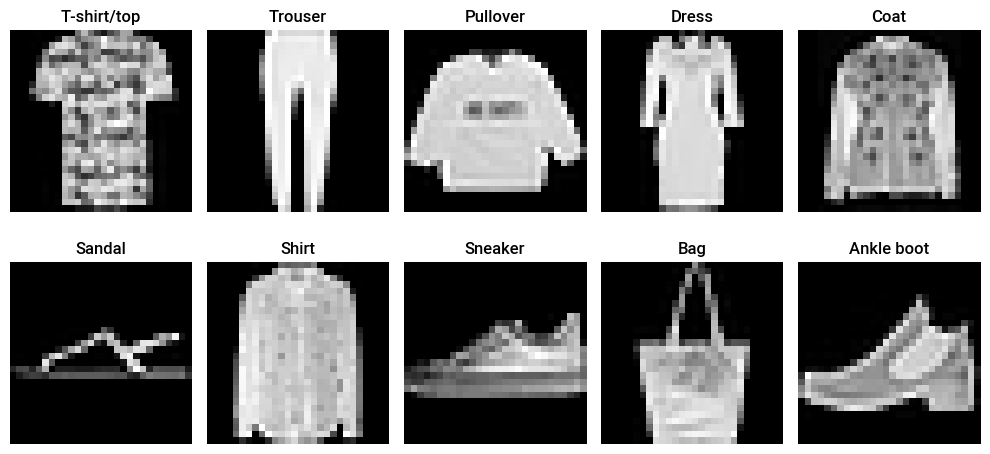

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the class names for Fashion MNIST
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Sample a few images from different classes
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

for i, ax in enumerate(axes.ravel()):
    sample_image = fashion_mnist_df[fashion_mnist_df['label'] == i].iloc[0, 1:].values
    ax.imshow(sample_image.reshape(28, 28), cmap='gray')
    ax.set_title(class_names[i])
    ax.axis('off')

plt.tight_layout()
plt.show()


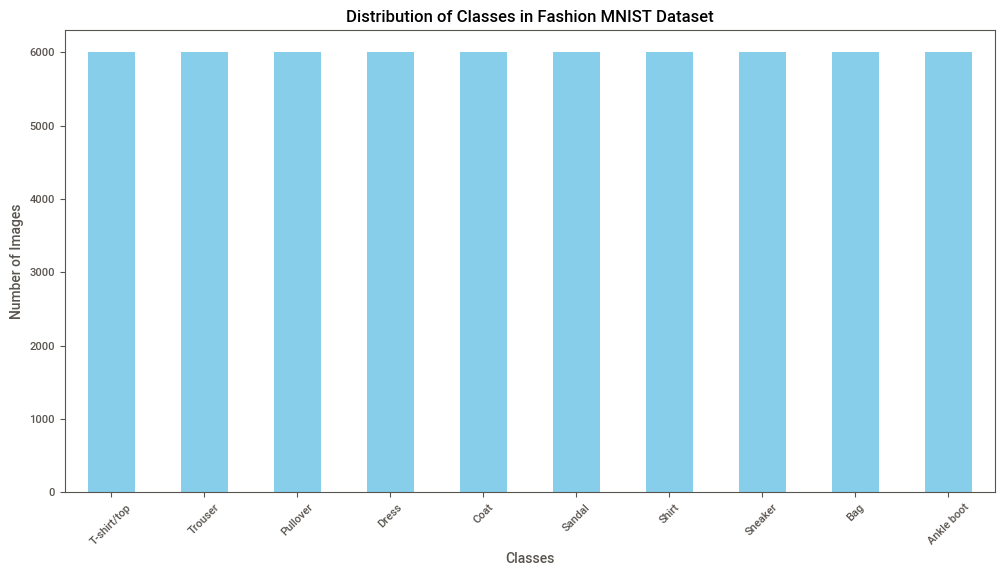

In [ ]:
# Check the distribution of the classes
class_distribution = fashion_mnist_df['label'].value_counts(sort=False)

# Plot the distribution
plt.figure(figsize=(12, 6))
class_distribution.plot(kind='bar', color='skyblue')
plt.xticks(ticks=range(10), labels=class_names, rotation=45)
plt.title("Distribution of Classes in Fashion MNIST Dataset")
plt.ylabel("Number of Images")
plt.xlabel("Classes")
plt.show()


In [ ]:
# Check basic statistics of pixel values
pixel_stats = fashion_mnist_df.iloc[:, 1:].describe()

# Display statistics for a few selected pixels for brevity
pixel_stats.iloc[:, [0, 100, 200, 300, 400, 500, 600, 700]].round(2)


,pixel1,pixel101,pixel201,pixel301,pixel401,pixel501,pixel601,pixel701
count,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00
mean,0.00,106.43,27.57,119.50,104.78,72.74,141.35,0.97
std,0.09,92.39,62.47,93.45,89.68,87.48,84.12,9.57
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,72.00,0.00
50%,0.00,114.00,0.00,141.00,107.00,6.00,169.00,0.00
75%,0.00,198.00,0.00,208.00,190.00,159.00,214.00,0.00
max,16.00,255.00,255.00,255.00,255.00,255.00,255.00,227.00


In [ ]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpms2i5702
  JVM stdout: /tmp/tmpms2i5702/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpms2i5702/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,15 days
H2O_cluster_name:,H2O_from_python_unknownUser_pwxk5e
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
h2o_data = h2o.H2OFrame(fashion_mnist_df)

y = "label"
x = h2o_data.columns
x.remove(y)

from h2o.automl import H2OAutoML

automl = H2OAutoML(max_models=5, seed=1, max_runtime_secs=500)
automl.train(x=x, y=y, training_frame=h2o_data)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
,125.0,125.0,195753.0,15.0,15.0,15.0,35.0,243.0,119.328
,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2023-10-31 11:08:45,0.025 sec,0.0,2.8720387,2.4996611,8.2486064,2.8704381,2.4985352,8.2394151
,2023-10-31 11:09:14,28.857 sec,5.0,1.9590736,1.6835803,3.8379693,1.9710285,1.6902944,3.8849534
,2023-10-31 11:09:34,48.411 sec,10.0,1.4700970,1.2118998,2.1611851,1.4991326,1.2286725,2.2473985
,2023-10-31 11:09:58,1 min 12.484 sec,15.0,1.2216721,0.9334329,1.4924828,1.2726238,0.9631211,1.6195713
,2023-10-31 11:10:24,1 min 38.452 sec,20.0,1.0921689,0.7631062,1.1928330,1.1710222,0.8077093,1.3712930
,2023-10-31 11:10:43,1 min 57.537 sec,25.0,1.0202898,0.6572294,1.0409912,1.1224952,0.7146733,1.2599954
,2023-10-31 11:11:06,2 min 20.733 sec,30.0,0.9734453,0.5911178,0.9475958,1.0976258,0.6601163,1.2047823
,2023-10-31 11:11:23,2 min 37.921 sec,35.0,0.9405330,0.5520528,0.8846024,1.0849602,0.6324874,1.1771386
